In [0]:
from google.colab import drive
drive.mount('/content/drive/')
import os
print(os.getcwd())

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/
/content


In [0]:
os.chdir('../content/')

In [0]:
%ls

 altitude_latlong.csv
 census_2011.csv
 drive/
'Final Population Data - AI for Earth - Sheet1.csv'
 humidity.csv
 pollution.csv
 population_state_district.csv
 rainfall.csv
 sample_data/
 state_district_mapping_with_latlong.csv
 TBdata.csv
 temperature.csv


## Let's first import all the libraries required for preprocessing analysis, cleaning as well as for visualisation of our datasets.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

***Let's read in our datasets, which are stored as comma seperated files***

In [0]:
import glob

In [0]:

files=[i for i in glob.glob('*.csv')]
print(files)
state_mapping_with_coords=pd.read_csv(files[0],header=None)
altitude_latlong=pd.read_csv(files[1])
census_2011=pd.read_csv(files[2])
final_population=pd.read_csv(files[3])
tb=pd.read_csv(files[4])
pop_state_dist=pd.read_csv(files[5])
temperature=pd.read_csv(files[6])
pollution=pd.read_csv(files[7])
rainfall=pd.read_csv(files[8])
humidity=pd.read_csv(files[9])

['state_district_mapping_with_latlong.csv', 'altitude_latlong.csv', 'census_2011.csv', 'Final Population Data - AI for Earth - Sheet1.csv', 'TBdata.csv', 'population_state_district.csv', 'temperature.csv', 'pollution.csv', 'rainfall.csv', 'humidity.csv']


In [0]:
print(state_mapping_with_coords.head())
state_mapping_with_coords.columns=['state','district','latitude','longitude']
print('******************************************************************')
print('Here the column names have been added:')
print('******************************************************************')
print(state_mapping_with_coords.head())

                     0                1          2          3
0  Andaman and Nicobar  Andaman Islands  12.382571  92.822911
1  Andaman and Nicobar  Nicobar Islands   7.835291  93.511601
2       Andhra Pradesh         Adilabad  19.284514  78.813212
3       Andhra Pradesh        Anantapur  14.312066  77.460158
4       Andhra Pradesh         Chittoor  13.331093  78.927639
******************************************************************
Here the column names have been added:
******************************************************************
                 state         district   latitude  longitude
0  Andaman and Nicobar  Andaman Islands  12.382571  92.822911
1  Andaman and Nicobar  Nicobar Islands   7.835291  93.511601
2       Andhra Pradesh         Adilabad  19.284514  78.813212
3       Andhra Pradesh        Anantapur  14.312066  77.460158
4       Andhra Pradesh         Chittoor  13.331093  78.927639


In [0]:
print(state_mapping_with_coords.describe())
print('******************************************************************')
state_mapping_with_coords.info()

         latitude   longitude
count  594.000000  594.000000
mean    23.215872   81.100989
std      5.743757    6.245789
min      7.835291   68.821923
25%     20.570902   76.414526
50%     24.478686   79.429121
75%     26.861661   85.312213
max     34.599235   96.596708
******************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 4 columns):
state        594 non-null object
district     594 non-null object
latitude     594 non-null float64
longitude    594 non-null float64
dtypes: float64(2), object(2)
memory usage: 18.6+ KB


In [0]:
print('The number of states are:',state_mapping_with_coords.state.nunique())
print('The number of districts in individual states are:')
print(state_mapping_with_coords.state.value_counts())
print("****************************************************")
print('The number of districts are:',state_mapping_with_coords.district.nunique())

The number of states are: 35
The number of districts in individual states are:
Uttar Pradesh             70
Madhya Pradesh            48
Bihar                     37
Maharashtra               34
Rajasthan                 32
Tamil Nadu                30
Orissa                    30
Karnataka                 27
Gujarat                   25
Assam                     23
Andhra Pradesh            23
Jharkhand                 22
Haryana                   19
West Bengal               19
Punjab                    17
Chhattisgarh              16
Arunachal Pradesh         15
Kerala                    14
Jammu and Kashmir         14
Uttaranchal               13
Himachal Pradesh          12
Manipur                    9
Mizoram                    8
Nagaland                   8
Meghalaya                  7
Sikkim                     4
Puducherry                 4
Tripura                    4
Daman and Diu              2
Goa                        2
Andaman and Nicobar        2
Chandigarh            

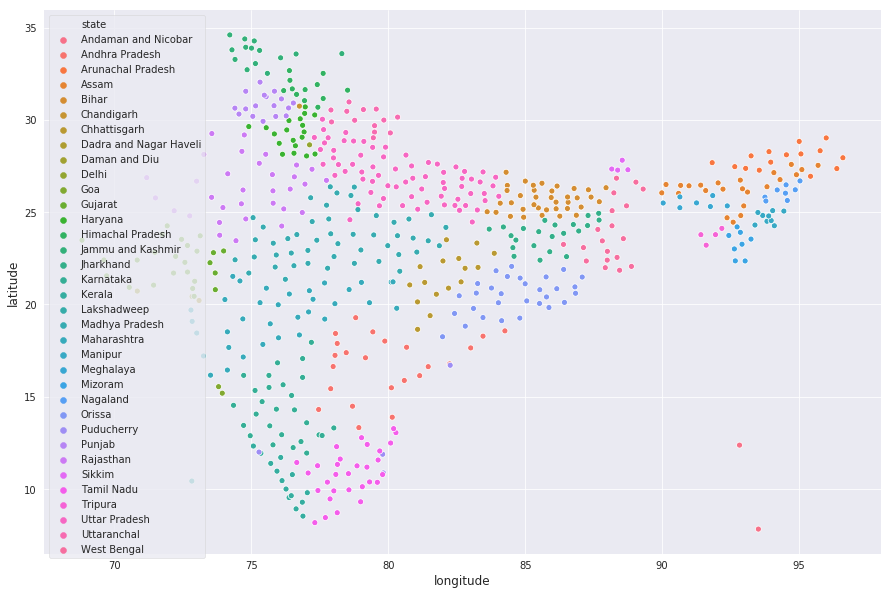

In [0]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.scatterplot(x='longitude',y='latitude',data=state_mapping_with_coords,hue='state',legend='brief')
plt.legend(loc='upper left')
sns.despine(left=True)
plt.show()


In [0]:
print('Our features in TB data are:', list(tb.columns))
print('*************************************************')
print('The shape of tb data is:',tb.shape)
print('*************************************************')
tb.head()

Our features in TB data are: ['State', 'District', 'Pop.Covered', 'Totalcasestreated', 'detectionrate\nAnnualized\nTotal', 'treated\nNewS+ve\ncases', 'detectionrate\nAnnualized\nsmear+ve', 'quarterno.', 'year', 'Latitude', 'Longitude']
*************************************************
The shape of tb data is: (20270, 11)
*************************************************


,State,District,Pop.Covered,Totalcasestreated,detectionrate Annualized Total,treated NewS+ve cases,detectionrate Annualized smear+ve,quarterno.,year,Latitude,Longitude
0,ANDAMANNICOBAR,ANDAMANNICOBAR,4.0,221,224.0,57,0.77,2006,1,12.36718,92.924179
1,ANDAMANNICOBAR,ANDAMANNICOBARISLANDS,4.0,262,268.0,91,1.24,2005,4,12.36718,92.924179
2,ANDAMANNICOBAR,ANDAMANNICOBARISLANDS,4.0,252,256.0,82,1.11,2006,4,12.36718,92.924179
3,ANDAMANNICOBAR,ANDAMANNICOBARISLANDS,4.0,238,242.0,77,1.04,2006,2,12.36718,92.924179
4,ANDAMANNICOBAR,ANDAMANNICOBARISLANDS,4.0,209,212.0,58,0.79,2006,3,12.36718,92.924179


In [0]:
tb.describe()

,Pop.Covered,Totalcasestreated,detectionrate Annualized Total,treated NewS+ve cases,quarterno.,year,Latitude,Longitude
count,20269.000000,20270.000000,20259.000000,20270.000000,20270.000000,20270.000000,20270.000000,20251.000000
mean,18.260266,586.298421,138.598105,238.359349,2006.344894,2.530390,22.975130,80.254802
std,13.817178,518.238251,65.430573,203.615550,2.572371,1.117119,5.813040,6.484114
min,0.000000,0.000000,0.000000,0.000000,2001.000000,1.000000,7.000000,-0.698748
25%,9.000000,262.000000,102.000000,105.000000,2004.000000,2.000000,19.899290,76.112429
50%,15.000000,473.000000,127.000000,190.000000,2007.000000,3.000000,24.046131,78.146248
75%,25.000000,769.000000,158.000000,316.000000,2009.000000,4.000000,27.036007,84.036520
max,137.000000,8250.000000,1475.000000,3623.000000,2010.000000,4.000000,37.631648,96.164714


In [0]:
print(tb.State.value_counts()[:40])

UTTARPRADESH                  1954
MAHARASHTRA                   1773
MADHYAPRADESH                 1362
RAJASTHAN                     1254
TAMILNADU                     1151
GUJARAT                       1074
ORISSA                        1020
KARNATAKA                      965
BIHAR                          868
DELHI                          844
ANDHRAPRADESH                  816
WESTBENGAL                     703
ASSAM                          643
HARYANA                        595
JHARKHAND                      595
KERALA                         560
PUNJAB                         533
HIMACHALPRADESH                471
CHHATISGARH                    397
ARUNACHALPRADESH               367
JAMMUKASHMIR                   324
MANIPUR                        322
NAGALAND                       288
MIZORAM                        246
UTTARAKHAND                    208
MEGHALAYA                      190
UTTARANCHAL                    153
SIKKIM                         144
TRIPURA             

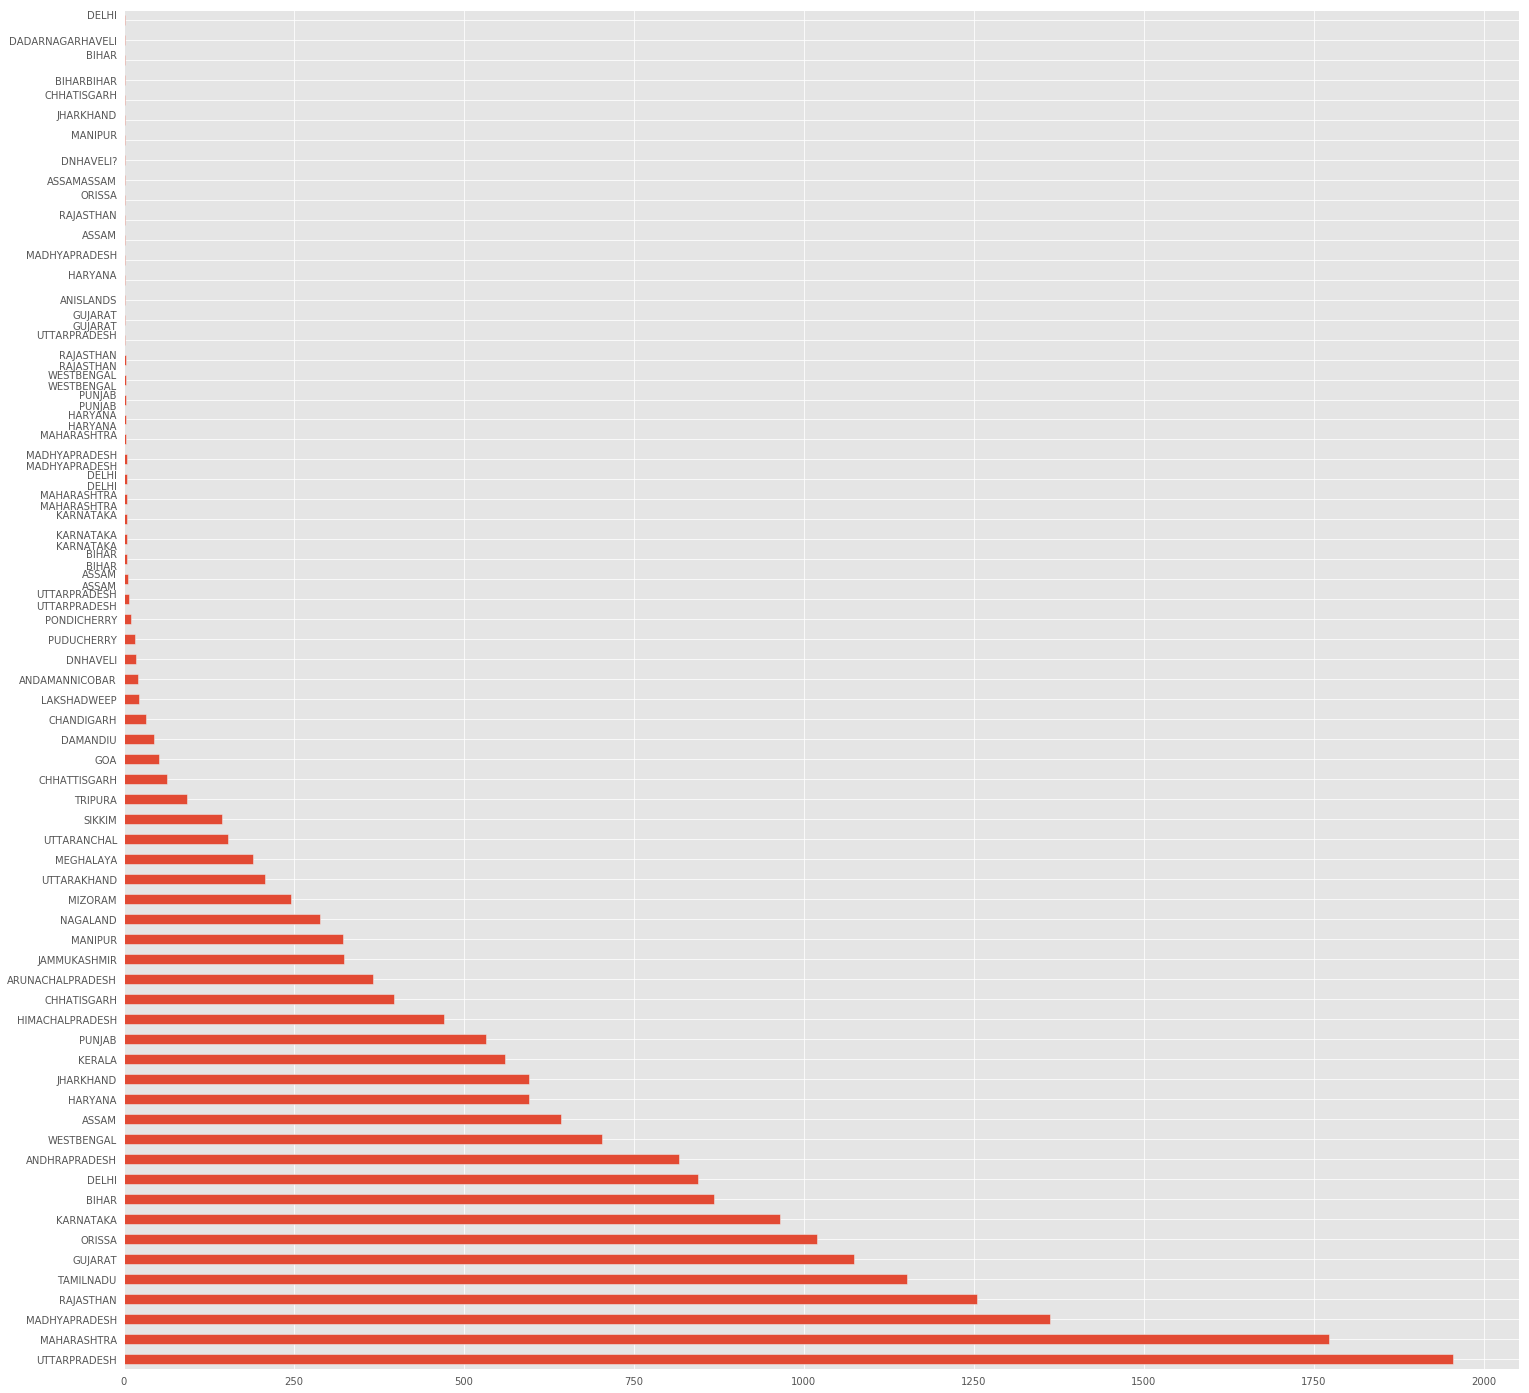

In [0]:
plt.figure(figsize=(25,25))
plt.style.use('ggplot')
tb.State.value_counts().plot(kind='barh')

In [0]:
print(plt.style.available)

['seaborn-bright', 'classic', 'tableau-colorblind10', 'seaborn-darkgrid', 'seaborn-pastel', '_classic_test', 'seaborn-dark-palette', 'bmh', 'seaborn-muted', 'seaborn-colorblind', 'ggplot', 'seaborn-poster', 'Solarize_Light2', 'seaborn-whitegrid', 'seaborn-deep', 'grayscale', 'seaborn-talk', 'seaborn', 'fast', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-notebook', 'seaborn-dark', 'seaborn-paper', 'seaborn-white', 'dark_background']


In [0]:
tb.isna().sum()

State                                    0
District                                 1
Pop.Covered                              1
Totalcasestreated                        0
detectionrate\nAnnualized\nTotal        11
treated\nNewS+ve\ncases                  0
detectionrate\nAnnualized\nsmear+ve    457
quarterno.                               0
year                                     0
Latitude                                 0
Longitude                               19
dtype: int64

In [0]:
tb[tb.Longitude.isna()==True]

,State,District,Pop.Covered,Totalcasestreated,detectionrate Annualized Total,treated NewS+ve cases,detectionrate Annualized smear+ve,quarterno.,year,Latitude,Longitude
12488,MIZORAM,AIZAWL,4.0,236,259.0,58,0.85,2006,4,23.724369,NaN
12489,MIZORAM,AIZAWL,4.0,214,235.0,53,0.78,2006,1,23.724369,NaN
12490,MIZORAM,AIZAWL,4.0,258,283.0,51,0.75,2006,2,23.724369,NaN
12491,MIZORAM,AIZAWL,4.0,309,335.0,69,1,2007,2,23.724369,NaN
12492,MIZORAM,AIZAWL,4.0,269,291.0,58,0.84,2007,3,23.724369,NaN
12493,MIZORAM,AIZAWL,4.0,297,322.0,58,0.84,2007,4,23.724369,NaN
12494,MIZORAM,AIZAWL,4.0,229,248.0,48,0.69,2007,1,23.724369,NaN
12495,MIZORAM,AIZAWL,4.0,354,379.0,71,1.01,2008,2,23.724369,NaN
12496,MIZORAM,AIZAWL,4.0,350,375.0,69,0.98,2008,3,23.724369,NaN
12497,MIZORAM,AIZAWL,4.0,296,317.0,52,0.74,2008,1,23.724369,NaN


In [0]:
#filling these values for mizoram aizawl
#https://www.mapsofindia.com/lat_long/mizoram/
longitude_of_aizawl=float(93)
tb_data=tb.copy()
tb_data.Longitude.fillna(longitude_of_aizawl,inplace=True,downcast='infer')

In [0]:
tb_data.columns=tb_data.columns.str.lower()
tb_data.columns=tb_data.columns.str.replace('\n','')
print(tb_data.columns)
tb_data.columns=['state', 'district', 'pop.covered', 'totalcasestreated',
       'detectionrateannualizedtotal', 'treatednews+vecases',
       'detectionrateannualizedsmear+ve', 'year', 'quarter', 'latitude',
       'longitude']

Index(['state', 'district', 'pop.covered', 'totalcasestreated',
       'detectionrateannualizedtotal', 'treatednews+vecases',
       'detectionrateannualizedsmear+ve', 'quarterno.', 'year', 'latitude',
       'longitude'],
      dtype='object')


In [0]:
tb_data.head()

,state,district,pop.covered,totalcasestreated,detectionrateannualizedtotal,treatednews+vecases,detectionrateannualizedsmear+ve,year,quarter,latitude,longitude
0,ANDAMANNICOBAR,ANDAMANNICOBAR,4.0,221,224.0,57,0.77,2006,1,12.36718,92.924179
1,ANDAMANNICOBAR,ANDAMANNICOBARISLANDS,4.0,262,268.0,91,1.24,2005,4,12.36718,92.924179
2,ANDAMANNICOBAR,ANDAMANNICOBARISLANDS,4.0,252,256.0,82,1.11,2006,4,12.36718,92.924179
3,ANDAMANNICOBAR,ANDAMANNICOBARISLANDS,4.0,238,242.0,77,1.04,2006,2,12.36718,92.924179
4,ANDAMANNICOBAR,ANDAMANNICOBARISLANDS,4.0,209,212.0,58,0.79,2006,3,12.36718,92.924179


In [0]:
tb_data['state']=tb_data['state'].str.lower()
tb_data['state']=tb_data['state'].str.replace('\n','')

In [0]:
tb_data['state'].unique()

array(['andamannicobar', 'andhrapradesh', 'anislands', 'arunachalpradesh',
       'assam', 'assamassam', 'bihar', 'biharbihar', 'chandigarh',
       'chhatisgarh', 'chhattisgarh', 'dadarnagarhaveli', 'damandiu',
       'delhi', 'delhidelhi', 'dnhaveli', 'dnhaveli?', 'goa', 'gujarat',
       'gujaratgujarat', 'haryana', 'haryanaharyana', 'himachalpradesh',
       'jammukashmir', 'jharkhand', 'karnataka', 'karnatakakarnataka',
       'kerala', 'lakshadweep', 'madhyapradesh',
       'madhyapradeshmadhyapradesh', 'maharashtra',
       'maharashtramaharashtra', 'manipur', 'meghalaya', 'mizoram',
       'nagaland', 'orissa', 'pondicherry', 'puducherry', 'punjab',
       'punjabpunjab', 'rajasthan', 'rajasthanrajasthan', 'sikkim',
       'tamilnadu', 'tripura', 'uttarakhand', 'uttaranchal',
       'uttarpradesh', 'uttarpradeshuttarpradesh', 'westbengal',
       'westbengalwestbengal'], dtype=object)

In [0]:
tb_data['state']=tb_data['state'].str.replace('assamassam','assam')
tb_data['state']=tb_data['state'].str.replace('anislands','andamannicobar')
tb_data['state']=tb_data['state'].str.replace('biharbihar','bihar')
tb_data['state']=tb_data['state'].str.replace('chhatisgarh','chhattisgarh')
tb_data['state']=tb_data['state'].str.replace('dadarnagarhaveli','dadraandnagarhaveli')
tb_data['state']=tb_data['state'].str.replace('delhidelhi','delhi')
tb_data['state']=tb_data['state'].str.replace('dnhaveli','dadraandnagarhaveli')
tb_data['state']=tb_data['state'].str.replace('dnhaveli ?','Dadra and Nagar Haveli')
tb_data['state']=tb_data['state'].str.replace('gujaratgujarat','gujarat')
tb_data['state']=tb_data['state'].str.replace('haryanaharyana','haryana')
tb_data['state']=tb_data['state'].str.replace('karnatakakarnataka','karnataka')
tb_data['state']=tb_data['state'].str.replace('madhyapradeshmadhyapradesh','madhyapradesh')
tb_data['state']=tb_data['state'].str.replace('maharashtramaharashtra','maharashtra')
tb_data['state']=tb_data['state'].str.replace('pondicherry','puducherry')
tb_data['state']=tb_data['state'].str.replace('punjabpunjab','punjab')
tb_data['state']=tb_data['state'].str.replace('rajasthanrajasthan','rajasthan')
tb_data['state']=tb_data['state'].str.replace('uttarpradeshuttarpradesh','uttarpradesh')
tb_data['state']=tb_data['state'].str.replace('westbengalwestbengal','westbengal')
tb_data['state']=tb_data['state'].str.replace('uttarakhand','uttaranchal')

In [0]:
tb_data['state'].unique()

array(['andamannicobar', 'andhrapradesh', 'arunachalpradesh', 'assam',
       'bihar', 'chandigarh', 'chhattisgarh', 'dadraandnagarhaveli',
       'damandiu', 'delhi', 'dadraandnagarhaveli?', 'goa', 'gujarat',
       'haryana', 'himachalpradesh', 'jammukashmir', 'jharkhand',
       'karnataka', 'kerala', 'lakshadweep', 'madhyapradesh',
       'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland',
       'orissa', 'puducherry', 'punjab', 'rajasthan', 'sikkim',
       'tamilnadu', 'tripura', 'uttaranchal', 'uttarpradesh',
       'westbengal'], dtype=object)

In [0]:
tb_data['state']=tb_data['state'].str.replace('?','')

In [0]:
tb_data.state.unique()

array(['andamannicobar', 'andhrapradesh', 'arunachalpradesh', 'assam',
       'bihar', 'chandigarh', 'chhattisgarh', 'dadraandnagarhaveli',
       'damandiu', 'delhi', 'goa', 'gujarat', 'haryana',
       'himachalpradesh', 'jammukashmir', 'jharkhand', 'karnataka',
       'kerala', 'lakshadweep', 'madhyapradesh', 'maharashtra', 'manipur',
       'meghalaya', 'mizoram', 'nagaland', 'orissa', 'puducherry',
       'punjab', 'rajasthan', 'sikkim', 'tamilnadu', 'tripura',
       'uttaranchal', 'uttarpradesh', 'westbengal'], dtype=object)

In [0]:
state_mapping_with_coords.state.unique()

array(['Andaman and Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Orissa', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttaranchal',
       'West Bengal'], dtype=object)

In [0]:
tb_data['state']=tb_data['state'].str.capitalize()

In [0]:
tb_data['state'].unique()

array(['Andamannicobar', 'Andhrapradesh', 'Arunachalpradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadraandnagarhaveli',
       'Damandiu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachalpradesh', 'Jammukashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhyapradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Orissa', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamilnadu', 'Tripura',
       'Uttaranchal', 'Uttarpradesh', 'Westbengal'], dtype=object)

In [0]:
tb_data['state']=tb_data['state'].str.replace('Andamannicobar','Andaman and Nicobar')
tb_data['state']=tb_data['state'].str.replace('Dadraandnagarhaveli','Dadra and Nagar Haveli')
tb_data['state']=tb_data['state'].str.replace('pradesh',' Pradesh')
tb_data['state']=tb_data['state'].str.replace('bengal',' Bengal')
tb_data['state']=tb_data['state'].str.replace('nadu',' Nadu')
tb_data['state']=tb_data['state'].str.replace('kashmir',' and Kashmir')
tb_data['state']=tb_data['state'].str.replace('diu',' and Diu')

In [0]:
tb_data['state'].unique()

array(['Andaman and Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Orissa', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttaranchal', 'Uttar Pradesh',
       'West Bengal'], dtype=object)

In [0]:
tb_data['state'].nunique()

35

In [0]:
tb_data['district'].unique()

array(['ANDAMANNICOBAR', 'ANDAMANNICOBARISLANDS', 'ADILABAD', 'ANANTAPUR',
       'BHADRACHALAM', 'CHITTOOR', 'CHITTOR', 'CUDDAPAH', 'EASTGODAVARI',
       'GUNTUR', 'HYDERABAD', 'KARIMNAGAR', 'KHAMMAM', 'KRISHNA',
       'KURNOOL', 'MAHABOOBNAGAR', 'MAHBUBNAGAR', 'MEDAK', 'NALGONDA',
       'NELLORE', 'NIZAMABAD', 'PRAKASAM', 'RANGAREDDI', 'RANGAREDDY',
       'SRIKAKULAM', 'VISAKHAPATNAM', 'VIZIANAGARAM', 'WARANGAL',
       'WARRANGAL', 'WESTGODAVARI', 'ANDAMANS', 'NICOBARS', 'ALONG',
       'ALONGDTC', 'BOMDILA', 'BOMDILADTC', 'CHANGLANG', 'DEOMALI',
       'DEOMALIDTC', 'DIBANGVALLEY', 'EASTKAMENG', 'EASTSIANG', 'LOHIT',
       'LOWERSUBANSIRI', 'PAPUMPARE', 'PASHIGHAT', 'PASIGHATDTC',
       'TAWANG', 'TEZU', 'TEZUDTC', 'TIRAP?', 'TIRAP†', 'UPPERSIANG',
       'UPPERSUBANSIRI', 'WESTKAMENG', 'WESTSIANG', 'ZERO', 'ZIRODTC',
       'BARPETA', 'BONGAIGAON', 'CACHAR', 'DARRANG', 'DHEMAJI', 'DHUBRI',
       'DHURBI', 'DIBRUGARH', 'GOALPARA', 'GOLAGHAT', 'HAILAKANDI',
       'JORHAT', '

In [0]:
altitude_latlong.head()

,Latitude,Longitude,Altitude(in meters)
0,12.382571,92.822911,42
1,7.835291,93.511601,0
2,19.284514,78.813212,372
3,14.312066,77.460158,538
4,13.331093,78.927639,429


In [0]:
print(state_mapping_with_coords.district.nunique())
state_mapping_with_coords.columns

589


Index(['state', 'district', 'latitude', 'longitude'], dtype='object')

In [0]:
state_mapping_with_coords.district.unique()

array(['Andaman Islands', 'Nicobar Islands', 'Adilabad', 'Anantapur',
       'Chittoor', 'Cuddapah', 'East Godavari', 'Guntur', 'Hyderabad',
       'Karimnagar', 'Khammam', 'Krishna', 'Kurnool', 'Mahbubnagar',
       'Medak', 'Nalgonda', 'Nellore', 'Nizamabad', 'Prakasam',
       'Rangareddi', 'Srikakulam', 'Vishakhapatnam', 'Vizianagaram',
       'Warangal', 'West Godavari', 'Changlang', 'East Kameng',
       'East Siang', 'Kurung Kumey', 'Lohit', 'Lower Dibang Valley',
       'Lower Subansiri', 'Papum Pare', 'Tawang', 'Tirap',
       'Upper Dibang Valley', 'Upper Siang', 'Upper Subansiri',
       'West Kameng', 'West Siang', 'Barpeta', 'Bongaigaon', 'Cachar',
       'Darrang', 'Dhemaji', 'Dhuburi', 'Dibrugarh', 'Goalpara',
       'Golaghat', 'Hailakandi', 'Jorhat', 'Kamrup', 'Karbi Anglong',
       'Karimganj', 'Kokrajhar', 'Lakhimpur', 'Marigaon', 'Nagaon',
       'Nalbari', 'North Cachar Hills', 'Sibsagar', 'Sonitpur',
       'Tinsukia', 'Araria', 'Aurangabad', 'Banka', 'Begusarai'

In [0]:
correct=[]
for x1,y1 in enumerate(state_mapping_with_coords.district.unique()):
  for x2,y2 in enumerate(pollution.District.unique()):
    if y1==y2:
      correct.append((x1,y1,x2))

In [0]:
len(correct)

122

In [0]:
correct

[(4, 'Chittoor', 174),
 (7, 'Guntur', 167),
 (8, 'Hyderabad', 32),
 (10, 'Khammam', 175),
 (12, 'Kurnool', 158),
 (15, 'Nalgonda', 168),
 (16, 'Nellore', 169),
 (17, 'Nizamabad', 247),
 (20, 'Srikakulam', 251),
 (23, 'Warangal', 170),
 (41, 'Bongaigaon', 110),
 (46, 'Dibrugarh', 136),
 (48, 'Golaghat', 137),
 (49, 'Hailakandi', 138),
 (55, 'Lakhimpur', 177),
 (57, 'Nagaon', 179),
 (58, 'Nalbari', 180),
 (60, 'Sibsagar', 139),
 (62, 'Tinsukia', 183),
 (64, 'Aurangabad', 70),
 (100, 'Chandigarh', 26),
 (102, 'Bilaspur', 253),
 (110, 'Korba', 60),
 (114, 'Raipur', 61),
 (118, 'Daman', 59),
 (120, 'Delhi', 3),
 (127, 'Bharuch', 68),
 (140, 'Rajkot', 69),
 (142, 'Surat', 7),
 (145, 'Vadodara', 94),
 (149, 'Faridabad', 8),
 (152, 'Hisar', 113),
 (173, 'Shimla', 9),
 (181, 'Jammu', 172),
 (194, 'Dhanbad', 0),
 (209, 'Ranchi', 95),
 (211, 'Saraikela Kharsawan', 186),
 (216, 'Belgaum', 116),
 (218, 'Bidar', 259),
 (219, 'Bijapur', 284),
 (222, 'Chitradurga', 260),
 (225, 'Dharwad', 218),
 (227,

In [0]:
for i,_,_ in correct:
  

In [0]:
print(pollution.District.nunique())

301


In [0]:
pollution.District.unique()

array(['Dhanbad', 'Jharia', 'Sindri', 'Delhi', 'Ponda', 'Vasco', 'Baroda',
       'Surat', 'Faridabad', 'Shimla', 'Mysore', 'Cochin', 'Pune',
       'Angul', 'Talcher', 'LudhiaNa', 'Kota', 'Madras', 'Agra', 'Anpara',
       'Haldia', 'Howrah', 'Bangalore', 'Nagda', 'Pondichery',
       'Turicorin', 'Chandigarh', 'Daman Diu & Nagar', 'Ahmedabad',
       'Bhilai', 'Dehradoon', 'Lucknow', 'Hyderabad', 'Jamshedpur',
       'Paonta Sahib', 'Parwanoo', 'Bhopal', 'Indore', 'SatNa', 'Bombay',
       'Nagpur', 'Jaipur', 'Gajroula', 'Kanpur', 'Calcutta', 'Guwahati',
       'PatNa', 'Vapi', 'YamuNa Nagar', 'Kottayam', 'Kotttayam',
       'Kozhikode', 'Trivendrum', 'Jabalpur', 'Shillong', 'Jalandhar',
       'Tuticorin', 'VaraNasi', 'VishakhapatNam', 'Daman', 'Korba',
       'Raipur', 'Chandarpur', 'Nalco', 'Rourkela', 'Alwar', 'Panjim',
       'Ankleshwar', 'Bharuch', 'Rajkot', 'Aurangabad', 'Jodhpur',
       'Ghaziabad', 'Noida, Ghaziabad', 'Dharuhera', 'Chandrapur',
       'Dombivli', 'Nashik',

In [0]:
pollution.head()

,State,District,Year,Quarter,SO2,NO2,rspm,spm
0,Bihar,Dhanbad,1987,1,17.766667,19.300000,NaN,153.000000
1,Bihar,Dhanbad,1987,3,10.966667,26.333333,NaN,159.333333
2,Bihar,Dhanbad,1987,4,23.600000,21.000000,NaN,227.000000
3,Bihar,Jharia,1987,1,33.966667,36.633333,NaN,481.666667
4,Bihar,Jharia,1987,2,41.700000,48.600000,NaN,621.000000


In [0]:
pollution.shape

(10700, 8)

In [0]:
pollution.State.unique()

array(['Bihar', 'Delhi', 'Goa', 'Gujarat', 'HaryaNa', 'Himachal Pradesh',
       'KarNataka', 'Kerala', 'Maharashtra', 'Odisha', 'Punjab',
       'Rajasthan', 'Tamil Nadu', 'Uttar Pradesh', 'West Bengal',
       'Madhya Pradesh', 'Puducherry', 'Chandigarh', 'Daman & Diu',
       'Andhra Pradesh', 'Assam', 'Meghalaya', 'Dadra & Nagar Haveli',
       'Chhattisgarh', 'Nagaland', 'Jharkhand', 'Uttarakhand', 'Mizoram',
       'Uttaranchal', 'Manipur', 'Sikkim', 'Jammu & Kashmir',
       'AruNachal Pradesh', 'TelangaNa'], dtype=object)

In [0]:
pollution.State=pollution.State.str.replace('N','n')
pollution.State=pollution.State.str.replace('&','and')
pollution.State=pollution.State.str.replace('Uttarakhand','Uttaranchal')

In [0]:
pollution.isna().sum()

State          0
District       0
Year           0
Quarter        0
SO2          554
NO2          320
rspm        3571
spm         4515
dtype: int64

In [0]:
pollution.State.unique()

array(['Bihar', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Karnataka', 'Kerala', 'Maharashtra', 'Odisha', 'Punjab',
       'Rajasthan', 'Tamil nadu', 'Uttar Pradesh', 'West Bengal',
       'Madhya Pradesh', 'Puducherry', 'Chandigarh', 'Daman and Diu',
       'Andhra Pradesh', 'Assam', 'Meghalaya', 'Dadra and nagar Haveli',
       'Chhattisgarh', 'nagaland', 'Jharkhand', 'Uttaranchal', 'Mizoram',
       'Manipur', 'Sikkim', 'Jammu and Kashmir', 'Arunachal Pradesh',
       'Telangana'], dtype=object)

In [0]:
pollution.State=pollution.State.str.replace('nadu','Nadu')
pollution.State=pollution.State.str.replace('nagar','Nagar')
pollution.State=pollution.State.str.replace('nagaland','Nagaland')

In [0]:
pollution.State.unique()

array(['Bihar', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Karnataka', 'Kerala', 'Maharashtra', 'Odisha', 'Punjab',
       'Rajasthan', 'Tamil Nadu', 'Uttar Pradesh', 'West Bengal',
       'Madhya Pradesh', 'Puducherry', 'Chandigarh', 'Daman and Diu',
       'Andhra Pradesh', 'Assam', 'Meghalaya', 'Dadra and Nagar Haveli',
       'Chhattisgarh', 'Nagaland', 'Jharkhand', 'Uttaranchal', 'Mizoram',
       'Manipur', 'Sikkim', 'Jammu and Kashmir', 'Arunachal Pradesh',
       'Telangana'], dtype=object)

In [0]:
pollution.District.unique()

array(['Dhanbad', 'Jharia', 'Sindri', 'Delhi', 'Ponda', 'Vasco', 'Baroda',
       'Surat', 'Faridabad', 'Shimla', 'Mysore', 'Cochin', 'Pune',
       'Angul', 'Talcher', 'LudhiaNa', 'Kota', 'Madras', 'Agra', 'Anpara',
       'Haldia', 'Howrah', 'Bangalore', 'Nagda', 'Pondichery',
       'Turicorin', 'Chandigarh', 'Daman Diu & Nagar', 'Ahmedabad',
       'Bhilai', 'Dehradoon', 'Lucknow', 'Hyderabad', 'Jamshedpur',
       'Paonta Sahib', 'Parwanoo', 'Bhopal', 'Indore', 'SatNa', 'Bombay',
       'Nagpur', 'Jaipur', 'Gajroula', 'Kanpur', 'Calcutta', 'Guwahati',
       'PatNa', 'Vapi', 'YamuNa Nagar', 'Kottayam', 'Kotttayam',
       'Kozhikode', 'Trivendrum', 'Jabalpur', 'Shillong', 'Jalandhar',
       'Tuticorin', 'VaraNasi', 'VishakhapatNam', 'Daman', 'Korba',
       'Raipur', 'Chandarpur', 'Nalco', 'Rourkela', 'Alwar', 'Panjim',
       'Ankleshwar', 'Bharuch', 'Rajkot', 'Aurangabad', 'Jodhpur',
       'Ghaziabad', 'Noida, Ghaziabad', 'Dharuhera', 'Chandrapur',
       'Dombivli', 'Nashik',

In [0]:
census_2011.head()

,Unnamed: 0,#,District,State,Population,Growth,Sex-Ratio,Literacy
0,0,1,Thane,Maharashtra,11060148,36.01 %,886,84.53
1,1,2,North Twenty Four Parganas,West Bengal,10009781,12.04 %,955,84.06
2,2,3,Bangalore,Karnataka,9621551,47.18 %,916,87.67
3,3,4,Pune,Maharashtra,9429408,30.37 %,915,86.15
4,4,5,Mumbai Suburban,Maharashtra,9356962,8.29 %,860,89.91


In [0]:
census_2011.State.unique()

array(['Maharashtra', 'West Bengal', 'Karnataka', 'Gujarat', 'Rajasthan',
       'Uttar Pradesh', 'Bihar', 'Andhra Pradesh', 'Tamil Nadu', 'Kerala',
       'Chhattisgarh', 'Delhi', 'Orissa', 'Punjab', 'Madhya Pradesh',
       'Jharkhand', 'Assam', 'Uttarakhand', 'Haryana', 'Tripura',
       'Jammu and Kashmir', 'Himachal Pradesh', 'Chandigarh',
       'Puducherry', 'Meghalaya', 'Goa', 'Manipur', 'Mizoram', 'Nagaland',
       'Dadra and Nagar Haveli', 'Sikkim', 'Andaman And Nicobar Islands',
       'Daman and Diu', 'Arunachal Pradesh', 'Lakshadweep'], dtype=object)

In [0]:
pop_state_dist.head()

,Year,district,state,population
0,2000,Thane,Maharashtra,"11,056,829"
1,2000,North Twenty Four Parganas,West Bengal,"10,006,778"
2,2000,Bangalore,Karnataka,"9,618,664"
3,2000,Pune,Maharashtra,"9,426,578"
4,2000,Mumbai Suburban,Maharashtra,"9,354,154"


In [0]:
pop_state_dist.state.nunique()

35

In [0]:
pop_state_dist.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [0]:
humidity.head()

,STATE,DISTRICT,YEAR,QUARTER,HUMIDITY
0,ANDHRA PRADESH,ADILABAD,1991,1,43.914528
1,ANDHRA PRADESH,ANANTAPUR,1992,1,43.510740
2,ANDHRA PRADESH,CHITTOOR,1993,1,43.326922
3,ANDHRA PRADESH,CUDDAPAH,1994,1,44.005025
4,ANDHRA PRADESH,EAST GODAVARI,1995,1,43.999297


In [0]:
humidity.YEAR.unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014])

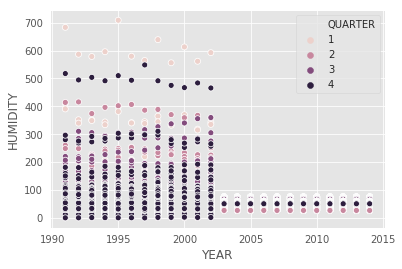

In [0]:
sns.scatterplot(x='YEAR',y='HUMIDITY',hue='QUARTER',data=humidity,legend='brief');

In [0]:
print(humidity.STATE.unique());print(humidity.STATE.nunique())

['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHANDIGARH'
 'CHHATTISGARH' 'DADRA & NAGAR HAVELI' 'DAMAN & DIU' 'DELHI' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERELA' 'LAKSHADWEEP' 'MADHYA PRADESH' 'MAHARASHTRA'
 'MANIPUR' 'MEGHALAYA' 'MIZORAM' 'NAGALAND' 'ORISSA' 'PONDICHERRY'
 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU' 'TRIPURA' 'UTTAR PRADESH'
 'UTTARANCHAL' 'WESTBENGAL']
34


In [0]:
print(humidity.DISTRICT.unique())

['ADILABAD' 'ANANTAPUR' 'CHITTOOR' 'CUDDAPAH' 'EAST GODAVARI' 'GUNTUR'
 'HYDERABAD' 'KARIMNAGAR' 'KHAMMAM' 'KRISHNA' 'KURNOOL' 'MAHBUBNAGAR'
 'MEDAK' 'NALGONDA' 'NELLORE' 'NIZAMABAD' 'PRAKASAM' 'RANGAREDDI'
 'SRIKAKULAM' 'VISAKHAPATNAM' 'VIZIANAGARAM' 'WARANGAL' 'WEST GODAVARI'
 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG' 'EAST SIANG' 'LOHIT'
 'LOWER SUBANSIRI' 'TAWANG' 'TIRAP' 'UPPER SUBANSIRI' 'WEST KAMENG'
 'WEST SIANG' 'BARPETA' 'CACHAR' 'DARRANG' 'DHEMAJI' 'DHUBRI' 'DIBRUGARH'
 'GOALPARA' 'GOLAGHAT' 'HAILAKANDI' 'JORHAT' 'KAMRUP' 'KARBI ANGLONG'
 'KARIMGANJ' 'KOKRAJHAR' 'LAKHIMPUR' 'NAGAON' 'NALBARI'
 'NORTH CACHAR HILLS' 'SIBSAGAR' 'SONITPUR' 'TINSUKIA' 'ARARIA'
 'AURANGABAD' 'BANKA' 'BEGUSARAI' 'BHAGALPUR' 'BHOJPUR' 'BUXAR'
 'DARBHANGA' 'GAYA' 'GOPALGANJ' 'JAMUI' 'JEHANABAD' 'KAIMUR (BHABUA)'
 'KATIHAR' 'KHAGARIA' 'KISHANGANJ' 'LAKHISARAI' 'MADHEPURA' 'MADHUBANI'
 'MUNGER' 'MUZAFFARPUR' 'NALANDA' 'NAWADA' 'PASHCHIM CHAMPARAN' 'PATNA'
 'PURBA CHAMPARAN' 'PURNIA' 'ROHTAS' 'SAHARSA' 

In [0]:
rainfall.head()

,State,District,Year,quarter,rainfall
0,Andaman and Nicobar Islands,Andaman,2004,1,194.1
1,Andaman and Nicobar Islands,Nicobar,2004,1,232.4
2,Andaman and Nicobar Islands,Andaman,2004,2,1033.6
3,Andaman and Nicobar Islands,Nicobar,2004,2,799.2
4,Andaman and Nicobar Islands,Andaman,2004,3,920.8


In [0]:
rainfall.Year.unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2001, 2002, 2003])

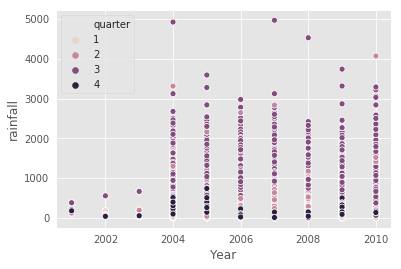

In [0]:
sns.scatterplot(x='Year',y='rainfall',hue='quarter',data=rainfall,legend='brief');

In [0]:
temperature.head()

,STATE,DISTRICT,YEAR,quarter,id,avg temp
0,GUJARAT,AHMADABAD,2003,1,1,20.463742
1,GUJARAT,AMRELI,2003,1,2,20.457956
2,GUJARAT,ANAND,2003,1,3,20.457246
3,GUJARAT,BANAS KANTHA,2003,1,4,20.463722
4,GUJARAT,BHARUCH,2003,1,5,20.479495


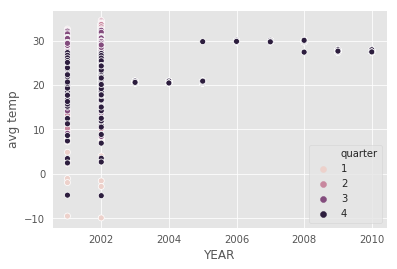

In [0]:
sns.scatterplot(x='YEAR',y='avg temp',hue='quarter',data=temperature,legend='brief');